In [1]:
import sys
sys.path.insert(0, 'velocitySlamSeq//slam_seq')

In [2]:
import numpy as np
from moments import moments
from gillespie import *

In [3]:
params = {'a': 0.1, 'b': 0.5, 'la': 0.7, 'alpha_a': 100, 'alpha_i': 1, 'sigma': 0.6, 'beta': 0.5, 'gamma': 0.1}
mom = moments(**params)
x0 = np.zeros(mom.n_species)
t = np.linspace(0, 100, 500)
x = mom.integrate(t, x0)

In [4]:
trajs_T, trajs_C = simulate_Gillespie(*list(params.values()), C0=np.zeros(5), t_span=[0, 100], n_traj=50, report=True)

In [5]:
T = np.linspace(0, 95, 50)
n_species = 5;
n_mean = np.zeros((n_species, len(T)))
n_2mom = np.zeros((n_species, len(T)))
for j in range(n_species):
    n_mean[j] = temporal_average( T, trajs_T, trajs_C, j );
    n_2mom[j] = temporal_average( T, trajs_T, trajs_C, j, lambda x : x*(x-1) );
n_2mom_ux = temporal_cov(T, trajs_T, trajs_C, 1, 3)
n_2mom_wy = temporal_cov(T, trajs_T, trajs_C, 2, 4)
n_var = n_2mom + n_mean - n_mean**2;
n_cov_ux = n_2mom_ux - n_mean[1] * n_mean[3]
n_cov_wy = n_2mom_wy - n_mean[2] * n_mean[4]

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

2.3333333333333326


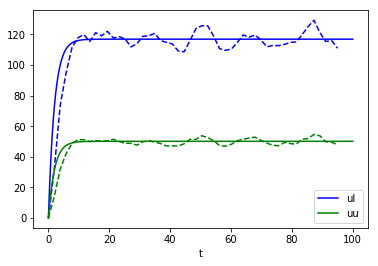

In [10]:
n_ul = mom.get_nu()
n_uu = mom.get_nw()
plt.plot(t, n_ul, 'b', label='ul')
plt.plot(T, n_mean[1], 'b--')
plt.plot(t, n_uu, 'g', label='uu')
plt.plot(T, n_mean[2], 'g--')
plt.legend(loc='best')
plt.xlabel('t')
print(np.mean(np.divide(n_ul[1:], n_uu[1:])))

In [ ]:
unspliced_A = mom.x[:, mom.ua] + mom.x[:, mom.wa]
unspliced_I = mom.x[:, mom.ui] + mom.x[:, mom.wi]
plt.plot(t, unspliced_A, 'b', label='unspliced_A')
plt.plot(t, unspliced_I, 'g', label='unspliced_I')
plt.plot(t, mom.fbar(unspliced_A, unspliced_I), 'r', label='unspliced')
plt.legend(loc='best')
plt.xlabel('t')
print(np.mean(mom.x[1:, mom.ua] / mom.x[1:, mom.ui]))
print((mom.a*mom.ai + (mom.b+mom.be)*mom.aa)/((mom.b+mom.be)*mom.ai + mom.b*mom.aa))

In [ ]:
n_sl = mom.get_nx()
n_su = mom.get_ny()
plt.plot(t, n_sl, 'b', label='sl')
plt.plot(T, n_mean[3], 'b--')
plt.plot(t, n_su, 'g', label='su')
plt.plot(T, n_mean[4], 'g--')
plt.legend(loc='best')
plt.xlabel('t')

In [ ]:
plt.plot(t, x[:, mom.uu], 'b', label='2nd_mom_ul')
plt.plot(t, x[:, mom.ww], 'g', label='2nd_mom_uu')
plt.legend(loc='best')
plt.xlabel('t')

In [ ]:
var_ul = mom.get_var_nu()
var_uu = mom.get_var_nw()
plt.plot(t, var_ul, 'b', label='var_ul')
plt.plot(T, n_var[1], 'b--')
plt.plot(t, var_uu, 'g', label='var_uu')
plt.plot(T, n_var[2], 'g--')
plt.legend(loc='best')
plt.xlabel('t')

In [ ]:
plt.plot(t, x[:, mom.xx], 'b', label='2nd_mom_sl')
plt.plot(t, x[:, mom.yy], 'g', label='2nd_mom_su')
plt.legend(loc='best')
plt.xlabel('t')

In [ ]:
var_sl = mom.get_var_nx()
var_su = mom.get_var_ny()
plt.plot(t, var_sl, 'b', label='var_sl')
plt.plot(T, n_var[3], 'b--')
plt.plot(t, var_su, 'g', label='var_su')
plt.plot(T, n_var[4], 'g--')
plt.legend(loc='best')
plt.xlabel('t')

In [ ]:
cov_uu_su = mom.get_cov_ux()
cov_ul_sl = mom.get_cov_wy()
plt.plot(t, cov_uu_su, 'b', label='cov(uu, su)')
plt.plot(T, n_cov_ux, 'b--')
plt.plot(t, cov_ul_sl, 'g', label='cov(ul, sl)')
plt.plot(T, n_cov_wy, 'g--')
plt.legend(loc='best')
plt.xlabel('t')

In [ ]:
trajs_C_nosplice = convert_nosplice(trajs_T, trajs_C)

In [ ]:
n_species = 2;
n_mean = np.zeros((n_species, len(T)))
n_2mom = np.zeros((n_species, len(T)))
for j in range(n_species):
    n_mean[j] = temporal_average( T, trajs_T, trajs_C_nosplice, j );
    n_2mom[j] = temporal_average( T, trajs_T, trajs_C_nosplice, j, lambda x : x*(x-1) );
n_var = n_2mom + n_mean - n_mean**2;

In [ ]:
n_labeled = mom.get_n_labeled()
n_unlabeled = mom.get_n_unlabeled()
plt.plot(t, n_labeled, 'b', label='labeled')
plt.plot(T, n_mean[0], 'b--')
plt.plot(t, n_unlabeled, 'g', label='unlabeled')
plt.plot(T, n_mean[1], 'g--')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Mean')

In [ ]:
var_labeled = mom.get_var_labeled()
var_unlabeled = mom.get_var_unlabeled()
plt.plot(t, var_labeled, 'b', label='labeled')
plt.plot(T, n_var[0], 'b--')
plt.plot(t, var_unlabeled, 'g', label='unlabeled')
plt.plot(T, n_var[1], 'g--')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('Variance')